# <span style="color:blue">งานฝึกปฏิบัติเดี่ยว สัปดาห์ที่ 13</span>
## <span style="color:green">(100 คะแนน) ข้อกำหนดของงานในภาพรวมเป็นการทดสอบความเข้าใจในเรื่อง Transfer Learning และ Data Augmentation โดยให้ใช้โมเดล pre-trained VGG16 (เทรนด้วยรูปภาพจาก ImageNet ที่มีจำนวนคลาส 1,000 ประเภท) มาปรับแต่งและเทรนเพิ่มเพื่อให้โมเดลสามารถจำแนกภาพจากชุดข้อมูลที่ให้มาได้</span>
  
#### <li style='line-height: 150% !important;'> (20 คะแนน) โค้ดด้านล่างนี้ใช้ดาวน์โหลดชุดข้อมูล train และ test พร้อมชื่อคลาสเข้ามาในโปรแกรม หลังจากที่ดาวน์โหลดชุดข้อมูลเรียบร้อยแล้ว ให้นิสิตแบ่งชุดข้อมูล train ออกเป็น 2 ส่วนในอัตราส่วน 80:20 และให้แต่ละคลาสมีจำนวนข้อมูลเท่ากัน โดยข้อมูลที่ถูกแบ่งให้เก็บอยู่ในชุดข้อมูลใหม่ที่เป็น train และ val ตามลำดับ </li>

```python
import gdown, pickle

url = "https://drive.google.com/uc?id=1fCiTC3a4EgoOV0E6Jiv-w0UeGDJwhGdf"

saved_fname = "data.pkl"
gdown.download(url, saved_fname, quiet=False)
(class_names, X_train, y_train, X_test, y_test) = pickle.load(open(saved_fname, "rb"))
```

#### <li style='line-height: 150% !important;'> (40 คะแนน) ให้ใช้โมเดล pre-trained VGG16  มาปรับแต่งและเทรนเพิ่มเพื่อให้โมเดลสามารถจำแนกรูปภาพในชุดข้อมูลใหม่นี้ได้ และเมื่อเทรนโมเดลแล้วเสร็จ ให้แสดงกราฟของค่า loss และ accuracy ด้วย นอกจากนี้ ให้ใช้ชุดข้อมูล test เพื่อแสดง Confusion Matrix และคำนวณหาค่า Accuracy, Precision, Recall, และ F1-Score (โค้ดด้านล่างเป็นตัวอย่างในการคำนวณค่าเหล่านี้) </li>

```python
from sklearn.metrics import classification_report

y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
    
print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))
```

#### <li style='line-height: 150% !important;'> (40 คะแนน) ให้เทรนโมเดล pre-trained VGG16 เพิ่มอีกโมเดลแต่สามารถปรับแต่งโครงสร้างให้แตกต่างจากโมเดลแรกได้ โดยให้ใช้ Data Augmentation ที่อย่างน้อยใช้การแปลง image shifting และ rotation ร่วมในการเทรน หลังจากนั้น ให้เปรียบเทียบโมเดลใหม่นี้กับโมเดลที่ได้จากข้อก่อนหน้า <span style="color:magenta"> โดยอธิบายผลลัพธ์ที่ได้จากการเปรียบเทียบค่าตัววัดประสิทธิภาพที่ได้จากโมเดลทั้งสองนี้</span> นอกจากนี้ ในการเทรนโมเดลทั้ง 2 โมเดลนี้ ให้ใช้ loss function, optimizer, metrics, epochs, และ learning_rate ที่เหมือนกัน หลังจากนั้น จากโมเดลแรก ให้พิจารณาคลาสที่มีค่า Precision สูงสุด โดยให้แสดงภาพจำนวน 3 ภาพที่โมเดลทำนายผิด โดยให้แสดงผลทำนายจากทั้งโมเดลแรกและโมเดลที่ผ่านการเทรนด้วย data augmentation พร้อมแสดงค่าคลาสจริงของภาพนั้นออกมาด้วย</li>

#### <span style="color:red"><li style='line-height: 150% !important;'> โค้ดและคำตอบในแต่ละข้อต้องแสดงให้เห็นอย่างชัดเจน </li></span>

#### <span style="color:red"><li style='line-height: 150% !important;'> เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 เท่านั้น และห้ามใช้ Early Stopping และห้ามเลือกเพียง Best Weights ในการเทรนโมเดล โดยการเทรนโมเดลต้องมีจำนวน epoch ที่หารด้วย 10 ลงตัวและไม่น้อยกว่า 20</li></span>

In [17]:
import os

os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [18]:
import numpy as np
import os, random, tensorflow as tf
import keras, gdown, pickle
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [3, 3]

def set_seed(seed_value=1234):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

set_seed(12345)

In [19]:
import gdown, pickle

url = "https://drive.google.com/uc?id=1fCiTC3a4EgoOV0E6Jiv-w0UeGDJwhGdf"

saved_fname = "data.pkl"
gdown.download(url, saved_fname, quiet=False)
(class_names, X_train, y_train, X_test, y_test) = pickle.load(open(saved_fname, "rb"))

Downloading...
From (original): https://drive.google.com/uc?id=1fCiTC3a4EgoOV0E6Jiv-w0UeGDJwhGdf
From (redirected): https://drive.google.com/uc?id=1fCiTC3a4EgoOV0E6Jiv-w0UeGDJwhGdf&confirm=t&uuid=05ac5a99-e55f-4795-9915-7383a5d8a6d3
To: /content/data.pkl
100%|██████████| 288M/288M [00:06<00:00, 43.9MB/s]


### View an Image

monkey 5


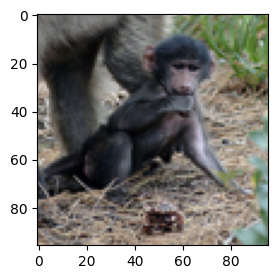

In [20]:
image_id = 11
print(class_names[y_test[image_id]], y_test[image_id])
plt.imshow(X_test[image_id])

## <li><span style="color:blue">(20 คะแนน) หลังจากที่ดาวน์โหลดชุดข้อมูลเรียบร้อยแล้ว ให้นิสิตแบ่งชุดข้อมูล train ออกเป็น 2 ส่วนในอัตราส่วน 80:20 และให้แต่ละคลาสมีจำนวนข้อมูลเท่ากัน โดยข้อมูลที่ถูกแบ่งให้เก็บอยู่ในชุดข้อมูลใหม่ที่เป็น train และ val ตามลำดับ (การแบ่งข้อมูลให้ใช้ค่า random seed ตามที่กำหนด) </li>

สิ่งที่แสดงด้านล่างนี้เป็นตัวอย่างกรณีที่ชุดข้อมูลมีจำนวนคลาส 6 ประเภท
```python
train class: [0 1 2 3 4 5]
train count: [960 960 960 960 960 960]
  val class: [0 1 2 3 4 5]
  val count: [240 240 240 240 240 240]
 test class: [0 1 2 3 4 5]
 test count: [100 100 100 100 100 100]
```

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=12345)

# Verify the split
print("Train class distribution:", np.bincount(y_train_split))
print("Validation class distribution:", np.bincount(y_val))
print("Test class distribution:", np.bincount(y_test))

Train class distribution: [980 980 980 980 980 980 980 980]
Validation class distribution: [245 245 245 245 245 245 245 245]
Test class distribution: [75 75 75 75 75 75 75 75]


## <span style="color:green">(คะแนนเต็ม 40 คะแนน)</span> <span style="color:blue"><li>(30 คะแนน) ให้ใช้โมเดล pre-trained VGG16  มาปรับแต่งและเทรนเพิ่มเพื่อให้โมเดลสามารถจำแนกรูปภาพในชุดข้อมูลใหม่นี้ได้ และเมื่อเทรนโมเดลแล้วเสร็จ ให้แสดงกราฟของค่า loss และ accuracy ด้วย </li></span>
### คะแนนในข้อนี้ถูกกำหนดโดยใช้เกณฑ์ด้านล่างนี้ ทั้งนี้ค่า accuracy ต้องถูกแสดงให้ปรากฏชัดเจนเพื่อใช้พิจารณาคะแนน
* #### (10 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.00, 0.75)```
* #### (15 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.75, 0.80)```
* #### (25 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.80, 0.90)```
* #### (30 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.90, 0.94)```
* #### (35 คะแนน) ค่า accuracy จากข้อมูลเทสตั้งแต่ ```0.94``` ขึ้นไป

In [22]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,207,880 (65.64 MB)

 Trainable params: 2,493,192 (9.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_split, y_train_split, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.3220 - loss: 23.0303 - val_accuracy: 0.7459 - val_loss: 3.1717
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5773 - loss: 6.7458 - val_accuracy: 0.7704 - val_loss: 2.6027
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6452 - loss: 4.4123 - val_accuracy: 0.7821 - val_loss: 2.3385
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6761 - loss: 3.5955 - val_accuracy: 0.7872 - val_loss: 2.1650
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7026 - loss: 2.9473 - val_accuracy: 0.7898 - val_loss: 2.0686
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7263 - loss: 2.5265 - val_accuracy: 0.7995 - val_loss: 2.0299
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7491 - loss: 2.2998 - val_accuracy: 0.7985 - val_loss: 1.9937
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7613 - loss: 2.1814 - v

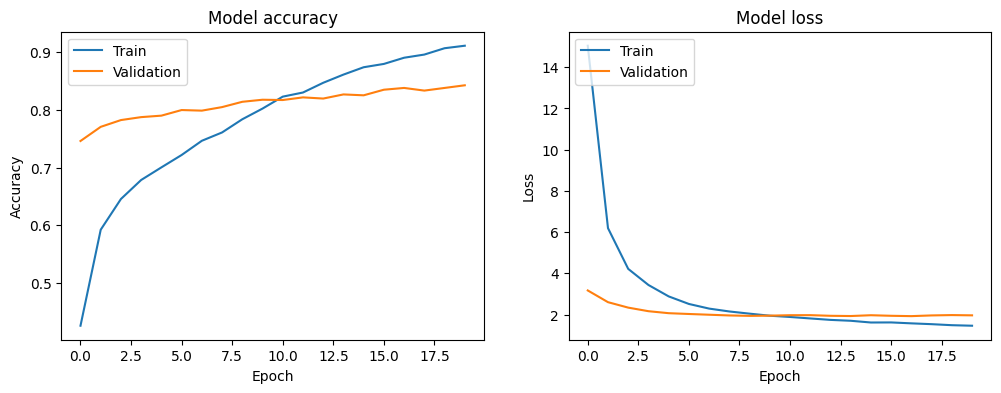

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## <span style="color:blue"><li>(10 คะแนน) นอกจากนี้ ให้ใช้ชุดข้อมูล test เพื่อแสดง Confusion Matrix และคำนวณหาค่า Accuracy, Precision, Recall, และ F1-Score</li></span>

In [25]:
from sklearn.metrics import classification_report

# Predict the classes for X_test
y_pred = model.predict(X_test)

# Convert predictions to class indices
y_pred_1d = np.argmax(y_pred, axis=1)

# Ensure y_test is one-dimensional
y_test_1d = y_test

print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
              precision    recall  f1-score   support

        bird       0.91      0.89      0.90        75
         cat       0.74      0.72      0.73        75
        deer       0.81      0.81      0.81        75
         dog       0.80      0.68      0.73        75
       horse       0.81      0.89      0.85        75
      monkey       0.83      0.89      0.86        75
    airplane       0.90      0.97      0.94        75
       truck       0.99      0.91      0.94        75

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



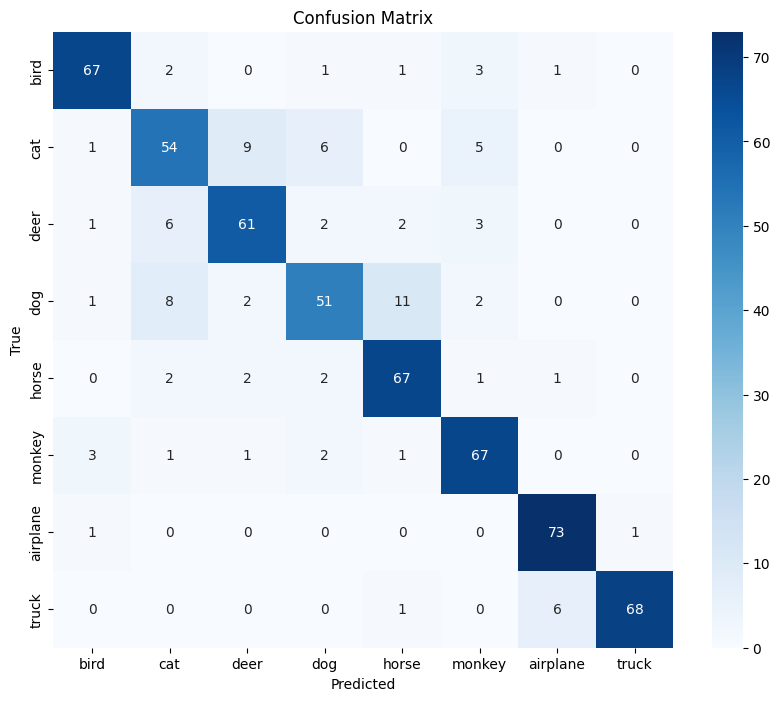

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_true=y_test_1d, y_pred=y_pred_1d)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## <span style="color:green">(คะแนนเต็ม 40 คะแนน)</span> <li><span style="color:blue">(30 คะแนน) ให้เทรนโมเดล pre-trained VGG16 เพิ่มอีกโมเดลแต่สามารถปรับแต่งโครงสร้างให้แตกต่างจากโมเดลแรกได้ โดยให้ใช้ Data Augmentation ที่อย่างน้อยใช้การแปลง image shifting และ rotation ร่วมในการเทรน หลังจากนั้น ให้เปรียบเทียบโมเดลใหม่นี้กับโมเดลที่ได้จากข้อก่อนหน้า <span style="color:magenta"> โดยอธิบายผลลัพธ์ที่ได้จากการเปรียบเทียบค่าตัววัดประสิทธิภาพที่ได้จากโมเดลทั้งสองนี้</span> นอกจากนี้ ในการเทรนโมเดลทั้ง 2 โมเดลนี้ ให้ใช้ loss function, optimizer, metrics, epochs, และ learning_rate ที่เหมือนกัน</li>

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with image shifting and rotation
datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2
)

# Load the VGG16 model without the top layers
base_model_aug = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add custom layers on top of the base model
x_aug = base_model.output
x_aug = Flatten()(x)
x_aug = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x_aug = Dropout(0.5)(x)
x_aug = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x_aug = Dropout(0.5)(x)
predictions_aug = Dense(len(class_names), activation='softmax')(x)

# Create the final model
model_aug = Model(inputs=base_model.input, outputs=predictions_aug)

# Freeze the layers of the base model
for layer in base_model_aug.layers:
  layer.trainable = False

# Compile the model
model_aug.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history_aug = model_aug.fit(datagen.flow(X_train_split, y_train_split, batch_size=32), validation_data=(X_val, y_val), epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


245/245 ━━━━━━━━━━━━━━━━━━━━ 36s 139ms/step - accuracy: 0.2364 - loss: 3.8342 - val_accuracy: 0.7209 - val_loss: 1.4876
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step - accuracy: 0.4810 - loss: 2.1177 - val_accuracy: 0.7872 - val_loss: 1.2497
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - accuracy: 0.5886 - loss: 1.7994 - val_accuracy: 0.8036 - val_loss: 1.2003
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.6126 - loss: 1.7020 - val_accuracy: 0.8061 - val_loss: 1.1570
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.6427 - loss: 1.6174 - val_accuracy: 0.8199 - val_loss: 1.0962
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.6769 - loss: 1.5126 - val_accuracy: 0.8306 - val_loss: 1.0810
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - accuracy: 0.6828 - loss: 1.4687 - val_accuracy: 0.8260 - val_loss: 1.0874
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 45s 137ms/step - accuracy: 0.6829 - loss: 1.4281 - val

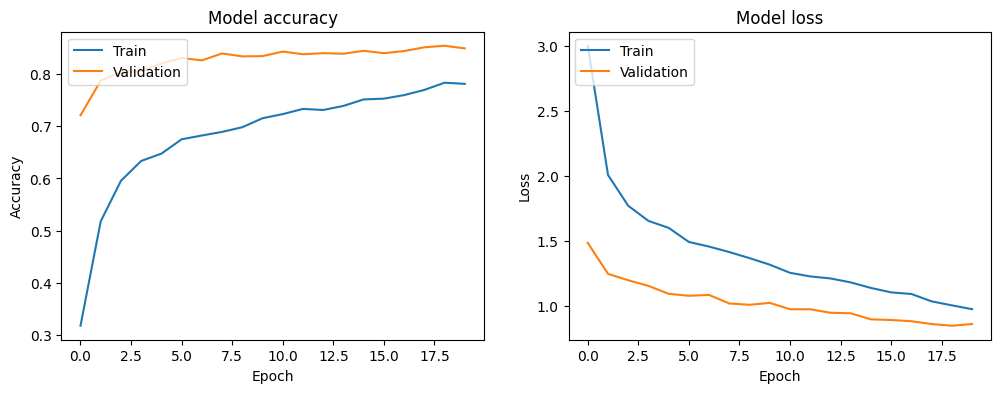

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [32]:
# Predict the classes for X_test
y_pred = model_aug.predict(X_test)

# Convert predictions to class indices
y_pred_1d = np.argmax(y_pred, axis=1)

# Ensure y_test is one-dimensional
y_test_1d = y_test

print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
              precision    recall  f1-score   support

        bird       0.91      0.92      0.91        75
         cat       0.79      0.73      0.76        75
        deer       0.87      0.83      0.85        75
         dog       0.77      0.76      0.77        75
       horse       0.85      0.95      0.89        75
      monkey       0.88      0.87      0.87        75
    airplane       0.96      0.97      0.97        75
       truck       0.97      0.97      0.97        75

    accuracy                           0.88       600
   macro avg       0.87      0.88      0.87       600
weighted avg       0.87      0.88      0.87       600



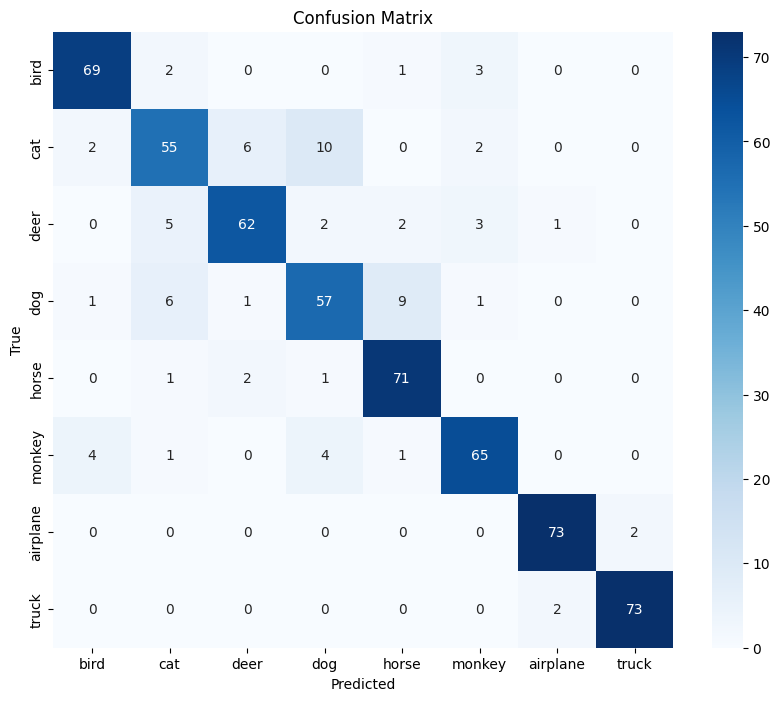

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true=y_test_1d, y_pred=y_pred_1d)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

##  จากการเปรียบเทียบประสิทธิภาพ

###  โมเดลที่ไม่ใช้ Data augmentation จะมีค่า Accuracy ในชุดข้อมูล train และ valid ที่สูงกว่าโมเดลที่ใช้ Data augmentation แต่ในชุดข้อมูล test จะต่ำกว่าโมเดลที่ใช้ Data augmentation นั่นหมายความว่า โมเดลที่ใช้ Data augmentation มีความแม่นยำในในชุดข้อมูลที่ไม่เคยเห็นมาก่อน หรือเหมาะกับการนำไปใช้งานใน Real world problem

## <li><span style="color:blue">(10 คะแนน) จากโมเดลแรก ให้พิจารณาคลาสที่มีค่า Precision สูงสุด โดยให้แสดงภาพจำนวน 3 ภาพที่โมเดลทำนายผิด โดยให้แสดงผลทำนายจากทั้งโมเดลแรกและโมเดลที่ผ่านการเทรนด้วย data augmentation พร้อมแสดงค่าคลาสจริงของภาพนั้นออกมาด้วย</li>

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Class with highest precision: bird


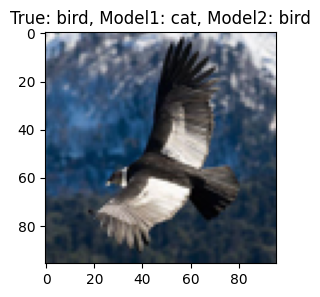

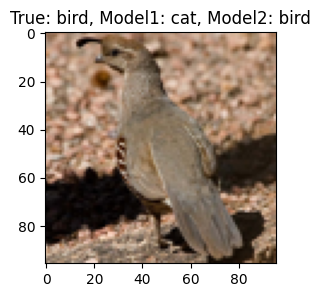

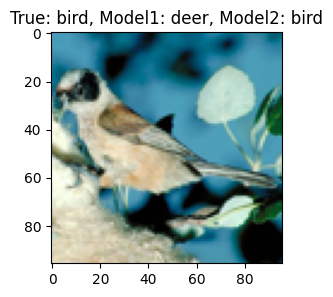

In [ ]:
from sklearn.metrics import classification_report

# Predict the classes for X_test using both models
y_pred = model.predict(X_test)
y_pred_aug = model_aug.predict(X_test)

y_test_1d = y_test
y_pred_1d = np.argmax(y_pred, axis=1)
y_pred_aug_1d = np.argmax(y_pred_aug, axis=1)

# Calculate precision for each class
report = classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names, output_dict=True)
precisions = {class_name: report[class_name]['precision'] for class_name in class_names}

# Find the class with the highest precision
max_precision_class = max(precisions, key=precisions.get)
print(f"Class with highest precision: {max_precision_class}")

# Find 3 misclassified images for the class with the highest precision
misclassified_indices = np.where((y_test_1d == class_names.index(max_precision_class)) & (y_test_1d != y_pred_1d))[0]
misclassified_indices = misclassified_indices[:3]  # Take the first 3 misclassified images

# Display the images along with their true labels and predictions from both models
for idx in misclassified_indices:
  plt.figure()
  plt.imshow(X_test[idx])
  plt.title(f"True: {class_names[y_test_1d[idx]]}, Model1: {class_names[y_pred_1d[idx]]}, Model2: {class_names[y_pred_aug_1d[idx]]}")
  plt.show()